<a href="https://colab.research.google.com/github/chirag1503/Chirag_Agrawal/blob/master/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


house_data = pd.read_csv('Housing.csv')
house_data.head()
house_data.tail()
house_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


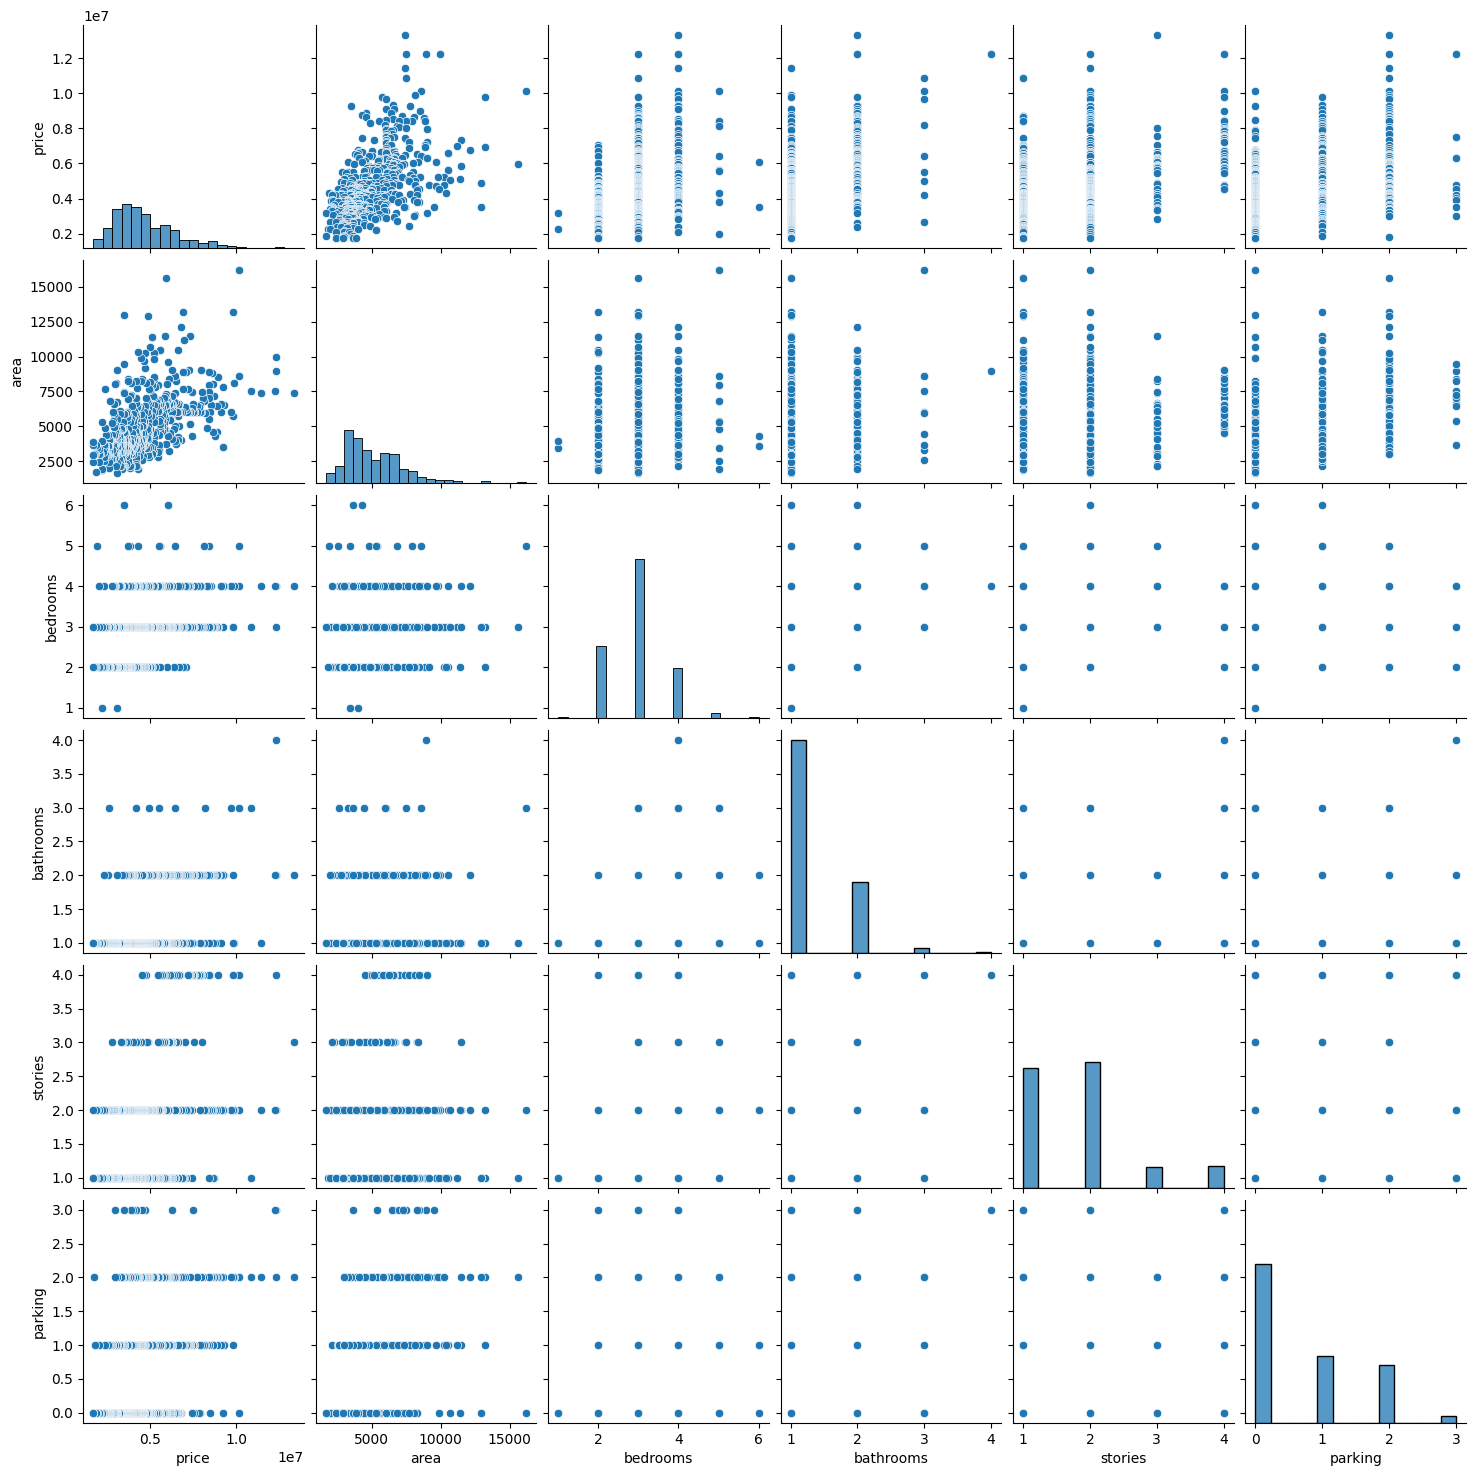

In [ ]:
sns.pairplot(house_data)

<Axes: >

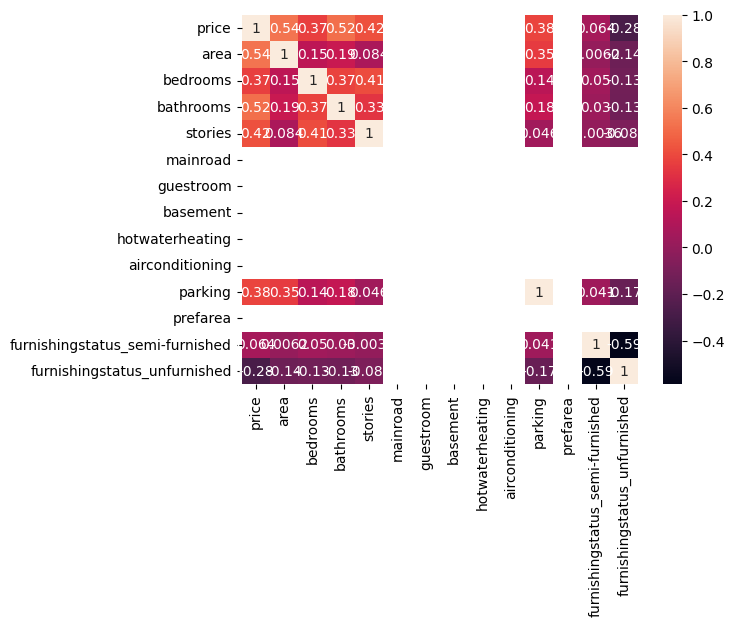

In [ ]:
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    house_data[column] = house_data[column].map({'yes': 1, 'no': 0})
house_data = pd.get_dummies(house_data, columns=['furnishingstatus'], drop_first=True)
sns.heatmap(house_data.corr(), annot=True)

In [ ]:
X = house_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

y = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

X_train


,area,bedrooms,bathrooms,stories,parking
519,4840,2,1,2,0
118,6420,3,1,1,0
407,2145,3,1,3,0
114,6800,2,1,1,2
515,3210,3,1,2,0
...,...,...,...,...,...
71,6000,4,2,4,0
106,5450,4,2,1,0
270,4500,3,2,3,1
435,4040,2,1,1,0


In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)

# y_pred = lm.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
area,336.172685
bedrooms,178013.913824
bathrooms,993579.922530
stories,473399.570570
parking,336583.688232


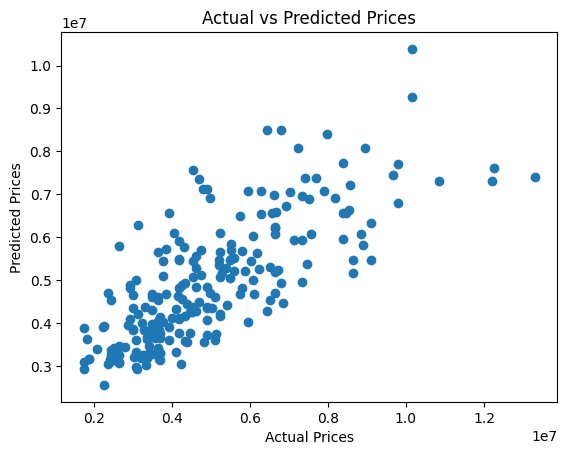

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

<ipython-input-29-391f0a685db8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50)


<Axes: xlabel='price', ylabel='Density'>

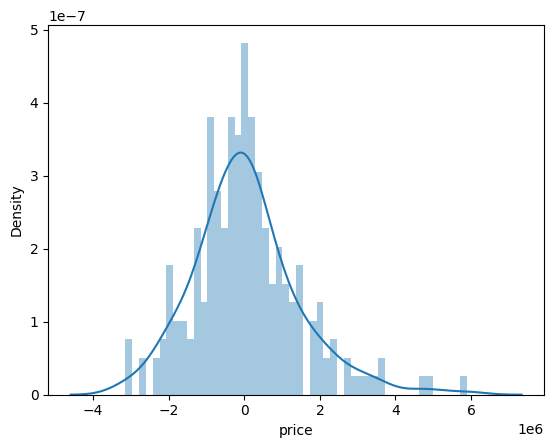

In [ ]:
sns.distplot((y_test-predictions), bins=50)

In [ ]:
mse = mean_squared_error(y_test, predcitions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predcitions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1994431012612.9485
R^2 Score: 0.5703186652276423


In [ ]:
results = X_test.copy()
results['Actual Price'] = y_test.values
results['Predicted Price'] = predictions
print(results.head())


     area  bedrooms  bathrooms  stories  parking  Actual Price  \
316  5900         4          2        2        1       4060000   
77   6500         3          2        3        0       6650000   
360  4040         2          1        1        0       3710000   
90   5000         3          1        2        0       6440000   
493  3960         3          1        1        0       2800000   

     Predicted Price  
316     6.088956e+06  
77      6.249462e+06  
360     3.304084e+06  
90      4.278223e+06  
493     3.455204e+06  


In [ ]:
# Input features for a new house
new_house = pd.DataFrame({
    'area': [2000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'parking': [1]
})

# Predict price
predicted_price = lm.predict(new_house)
print(f"Predicted Price for the new house: {predicted_price[0]}")


Predicted Price for the new house: 4599868.907484595
